# Data Visualization: Biketown

<center>
<img src="https://images.ctfassets.net/p6ae3zqfb1e3/2CeomZNihpBG2HdYlfr5nK/40135dfe151de3d26e0148b1eaea80dd/BIKETOWN_Homepage_Hero_2x.png?w=1000&q=60&fm=webp">
</center>


In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

Load: `https://s3.amazonaws.com/biketown-tripdata-public/2018_05.csv`

Output information for insight (we'll need to clean the dataset).

In [2]:
# Load Data
file = "https://s3.amazonaws.com/biketown-tripdata-public/2018_05.csv"

biketown_df = pd.read_csv(file)

# Output Info
biketown_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79399 entries, 0 to 79398
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RouteID           79399 non-null  int64  
 1   PaymentPlan       79399 non-null  object 
 2   StartHub          53666 non-null  object 
 3   StartLatitude     79377 non-null  float64
 4   StartLongitude    79377 non-null  float64
 5   StartDate         79399 non-null  object 
 6   StartTime         79399 non-null  object 
 7   EndHub            61560 non-null  object 
 8   EndLatitude       79377 non-null  float64
 9   EndLongitude      79377 non-null  float64
 10  EndDate           79399 non-null  object 
 11  EndTime           79399 non-null  object 
 12  TripType          47 non-null     object 
 13  BikeID            79399 non-null  int64  
 14  BikeName          79399 non-null  object 
 15  Distance_Miles    79399 non-null  float64
 16  Duration          78420 non-null  object

## Copy the DataFrame

For cleaning purposes, copy the DataFrame into a new DataFrame using `df.copy()`.

In [3]:
# Copy DataFrame for Cleaning
biketown_clean_df = biketown_df.copy()

## Drop: `TripType`

* `TripType` only contains 47 items.
* This is a tiny fraction of the data.
* Let's drop the entire column.

In [4]:
# Drop Trip Type Column
column_to_drop = ["TripType"]
biketown_clean_df = biketown_clean_df.drop(column_to_drop,
                                           axis=1)
# Output Info
biketown_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79399 entries, 0 to 79398
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RouteID           79399 non-null  int64  
 1   PaymentPlan       79399 non-null  object 
 2   StartHub          53666 non-null  object 
 3   StartLatitude     79377 non-null  float64
 4   StartLongitude    79377 non-null  float64
 5   StartDate         79399 non-null  object 
 6   StartTime         79399 non-null  object 
 7   EndHub            61560 non-null  object 
 8   EndLatitude       79377 non-null  float64
 9   EndLongitude      79377 non-null  float64
 10  EndDate           79399 non-null  object 
 11  EndTime           79399 non-null  object 
 12  BikeID            79399 non-null  int64  
 13  BikeName          79399 non-null  object 
 14  Distance_Miles    79399 non-null  float64
 15  Duration          78420 non-null  object 
 16  RentalAccessPath  79399 non-null  object

## Filling Nans: Start and End Hubs

* `StartHub` and `EndHub` contain missing values.
* Use `df.fillna()` to replace the missing values with `Unknown`.
* How might you apply `df.fillna()` to multiple columns?

In [5]:
# Fill Na
imputation_values = {"StartHub": "Unknown",
                     "EndHub": "Unknown"}

biketown_clean_df = biketown_clean_df.fillna(imputation_values)

biketown_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79399 entries, 0 to 79398
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RouteID           79399 non-null  int64  
 1   PaymentPlan       79399 non-null  object 
 2   StartHub          79399 non-null  object 
 3   StartLatitude     79377 non-null  float64
 4   StartLongitude    79377 non-null  float64
 5   StartDate         79399 non-null  object 
 6   StartTime         79399 non-null  object 
 7   EndHub            79399 non-null  object 
 8   EndLatitude       79377 non-null  float64
 9   EndLongitude      79377 non-null  float64
 10  EndDate           79399 non-null  object 
 11  EndTime           79399 non-null  object 
 12  BikeID            79399 non-null  int64  
 13  BikeName          79399 non-null  object 
 14  Distance_Miles    79399 non-null  float64
 15  Duration          78420 non-null  object 
 16  RentalAccessPath  79399 non-null  object

## Filling Nans: Geographic Data

* Fill the `Nan` values in `StartLatitude`, `EndLatitude`, `StartLongitude`, and `EndLongitude` with median value of each column.

In [6]:
## Filling Nan: Geographic Data
imputation_values = {"StartLatitude": biketown_clean_df["StartLatitude"].median(),
                     "StartLongitude": biketown_clean_df["StartLongitude"].median(),
                     "EndLatitude": biketown_clean_df["EndLatitude"].median(),
                     "EndLongitude": biketown_clean_df["EndLongitude"].median()}

biketown_clean_df = biketown_clean_df.fillna(imputation_values)

# Output Info
biketown_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79399 entries, 0 to 79398
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RouteID           79399 non-null  int64  
 1   PaymentPlan       79399 non-null  object 
 2   StartHub          79399 non-null  object 
 3   StartLatitude     79399 non-null  float64
 4   StartLongitude    79399 non-null  float64
 5   StartDate         79399 non-null  object 
 6   StartTime         79399 non-null  object 
 7   EndHub            79399 non-null  object 
 8   EndLatitude       79399 non-null  float64
 9   EndLongitude      79399 non-null  float64
 10  EndDate           79399 non-null  object 
 11  EndTime           79399 non-null  object 
 12  BikeID            79399 non-null  int64  
 13  BikeName          79399 non-null  object 
 14  Distance_Miles    79399 non-null  float64
 15  Duration          78420 non-null  object 
 16  RentalAccessPath  79399 non-null  object

## Time Conversion

* Extract the time delta from `Duration` into a new column: `Duration_Timedelta`
* This can be achieved with `pd.to_timedelta()`

In [7]:
# Extract Time Delta
biketown_clean_df["Duration_Timedelta"] = pd.to_timedelta(biketown_clean_df["Duration"])

# Output Info
biketown_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79399 entries, 0 to 79398
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   RouteID             79399 non-null  int64          
 1   PaymentPlan         79399 non-null  object         
 2   StartHub            79399 non-null  object         
 3   StartLatitude       79399 non-null  float64        
 4   StartLongitude      79399 non-null  float64        
 5   StartDate           79399 non-null  object         
 6   StartTime           79399 non-null  object         
 7   EndHub              79399 non-null  object         
 8   EndLatitude         79399 non-null  float64        
 9   EndLongitude        79399 non-null  float64        
 10  EndDate             79399 non-null  object         
 11  EndTime             79399 non-null  object         
 12  BikeID              79399 non-null  int64          
 13  BikeName            79399 non-n

## Time Conversion: Seconds

* Extract the total seconds from `Duration_Timedelta` into a new column: `Duration_Seconds`.
* This can be achieved using `.dt.total_seconds()` on the `timedelta` object.

In [8]:
## Time Conversion - Seconds
biketown_clean_df["Duration_Seconds"] = biketown_clean_df["Duration_Timedelta"].dt.total_seconds()

# Output Info
biketown_clean_df["Duration_Seconds"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 79399 entries, 0 to 79398
Series name: Duration_Seconds
Non-Null Count  Dtype  
--------------  -----  
78420 non-null  float64
dtypes: float64(1)
memory usage: 620.4 KB


## Fill NaTs

* Determine the median value of the `Duration_Seconds` column.
* Fill the `NaN`/`NaT` values of the `Duration_Seconds` columns with the median value

In [9]:
# Calculate Median
median_value = biketown_clean_df["Duration_Seconds"].median()

# Fill NaN with Median Value
biketown_clean_df["Duration_Seconds"] = biketown_clean_df["Duration_Seconds"].fillna(median_value)

# Output Info
biketown_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79399 entries, 0 to 79398
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   RouteID             79399 non-null  int64          
 1   PaymentPlan         79399 non-null  object         
 2   StartHub            79399 non-null  object         
 3   StartLatitude       79399 non-null  float64        
 4   StartLongitude      79399 non-null  float64        
 5   StartDate           79399 non-null  object         
 6   StartTime           79399 non-null  object         
 7   EndHub              79399 non-null  object         
 8   EndLatitude         79399 non-null  float64        
 9   EndLongitude        79399 non-null  float64        
 10  EndDate             79399 non-null  object         
 11  EndTime             79399 non-null  object         
 12  BikeID              79399 non-null  int64          
 13  BikeName            79399 non-n

## Drop `Duration_Timedelta` & `Duration`

* Drop the `Duration` and `Duration_Timedelta` columns

In [10]:
# Drop Duration_Timedelta & Duration Columns
columns_to_drop = ["Duration", "Duration_Timedelta"]

biketown_clean_df = biketown_clean_df.drop(columns_to_drop,
                                           axis=1)

biketown_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79399 entries, 0 to 79398
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RouteID           79399 non-null  int64  
 1   PaymentPlan       79399 non-null  object 
 2   StartHub          79399 non-null  object 
 3   StartLatitude     79399 non-null  float64
 4   StartLongitude    79399 non-null  float64
 5   StartDate         79399 non-null  object 
 6   StartTime         79399 non-null  object 
 7   EndHub            79399 non-null  object 
 8   EndLatitude       79399 non-null  float64
 9   EndLongitude      79399 non-null  float64
 10  EndDate           79399 non-null  object 
 11  EndTime           79399 non-null  object 
 12  BikeID            79399 non-null  int64  
 13  BikeName          79399 non-null  object 
 14  Distance_Miles    79399 non-null  float64
 15  RentalAccessPath  79399 non-null  object 
 16  MultipleRental    79399 non-null  bool  

## DateTime Conversions

* Convert `StartDate` and `EndDate` to datetime objects (format: `%m/%d/%Y`)
* Convert `StartTime` and `EndTime` to time objects (use `dt.time` to access `time`)

In [11]:
# Convert Date Time

# Start Date & End Date
biketown_clean_df["StartDate"] = pd.to_datetime(biketown_clean_df["StartDate"],
                                                format="%m/%d/%Y",
                                                errors="coerce")

biketown_clean_df["EndDate"] = pd.to_datetime(biketown_clean_df["EndDate"],
                                              format="%m/%d/%Y",
                                              errors="coerce")

# Start Time & End Time
biketown_clean_df["StartTime"] = pd.to_datetime(biketown_clean_df["StartTime"],
                                                errors="coerce").dt.time

biketown_clean_df["EndTime"] = pd.to_datetime(biketown_clean_df["EndTime"],
                                              errors="coerce").dt.time

# Output Info
biketown_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79399 entries, 0 to 79398
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   RouteID           79399 non-null  int64         
 1   PaymentPlan       79399 non-null  object        
 2   StartHub          79399 non-null  object        
 3   StartLatitude     79399 non-null  float64       
 4   StartLongitude    79399 non-null  float64       
 5   StartDate         79399 non-null  datetime64[ns]
 6   StartTime         79399 non-null  object        
 7   EndHub            79399 non-null  object        
 8   EndLatitude       79399 non-null  float64       
 9   EndLongitude      79399 non-null  float64       
 10  EndDate           79399 non-null  datetime64[ns]
 11  EndTime           79399 non-null  object        
 12  BikeID            79399 non-null  int64         
 13  BikeName          79399 non-null  object        
 14  Distance_Miles    7939

/var/folders/1d/b3zbklrj3833q1byhtz9hlh40000gp/T/ipykernel_65763/2604399998.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  biketown_clean_df["StartTime"] = pd.to_datetime(biketown_clean_df["StartTime"],
/var/folders/1d/b3zbklrj3833q1byhtz9hlh40000gp/T/ipykernel_65763/2604399998.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  biketown_clean_df["EndTime"] = pd.to_datetime(biketown_clean_df["EndTime"],


## That one ride...

* Use a mask to remove rides longer than 30 miles...

In [12]:
# Remove Outlier Rides
mask = biketown_clean_df["Distance_Miles"] < 30

biketown_clean_df = biketown_clean_df[mask]

# Output Info
biketown_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79395 entries, 0 to 79398
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   RouteID           79395 non-null  int64         
 1   PaymentPlan       79395 non-null  object        
 2   StartHub          79395 non-null  object        
 3   StartLatitude     79395 non-null  float64       
 4   StartLongitude    79395 non-null  float64       
 5   StartDate         79395 non-null  datetime64[ns]
 6   StartTime         79395 non-null  object        
 7   EndHub            79395 non-null  object        
 8   EndLatitude       79395 non-null  float64       
 9   EndLongitude      79395 non-null  float64       
 10  EndDate           79395 non-null  datetime64[ns]
 11  EndTime           79395 non-null  object        
 12  BikeID            79395 non-null  int64         
 13  BikeName          79395 non-null  object        
 14  Distance_Miles    79395 non

## Preview Data

* Take a look at the first few rows of data of your clean dataframe.

In [13]:
# Preview Data
biketown_clean_df.head(5)

,RouteID,PaymentPlan,StartHub,StartLatitude,StartLongitude,StartDate,StartTime,EndHub,EndLatitude,EndLongitude,EndDate,EndTime,BikeID,BikeName,Distance_Miles,RentalAccessPath,MultipleRental,Duration_Seconds
0,6624288,Subscriber,NW 13th at Marshall,45.530804,-122.684423,2018-05-01,00:06:00,NW 2nd at Everett,45.525367,-122.672546,2018-05-01,00:11:00,6503,0326 BIKETOWN,0.86,keypad,False,349.0
1,6624313,Subscriber,NW Johnson at Jamison Square,45.528637,-122.682019,2018-05-01,00:11:00,Unknown,45.526398,-122.689363,2018-05-01,00:16:00,6162,0874 BIKETOWN,0.51,keypad_rfid_card,False,272.0
2,6624387,Subscriber,NW Marshall at Tanner Springs Park,45.530831,-122.681596,2018-05-01,00:24:00,NW Couch at 11th,45.523742,-122.681813,2018-05-01,00:27:00,6535,0817 BIKETOWN,0.75,keypad,False,208.0
3,6624410,Subscriber,Unknown,45.516459,-122.630957,2018-05-01,00:28:00,Unknown,45.516527,-122.622968,2018-05-01,00:30:00,6179,0503 BIKETOWN,0.35,keypad,False,149.0
4,6624448,Casual,Unknown,45.529077,-122.654351,2018-05-01,00:36:00,NE 11th at Holladay Park,45.530279,-122.654669,2018-05-01,00:34:00,6548,0591 BIKETOWN,4.38,keypad,False,944.0


# Visualizing Data 

Now that our data is prepared, we will follow a few simple steps to graphically represent the data with `Seaborn`

1. __Draw Figure__

The first step is to initialize the canvas where your plot will be drawn.

```python
plt.figure(figsize=(width_in_inches, height_in_inches))
```

2. __Generate the Plot__

The next step uses a plotting function from a library like Seaborn (`sns`) to render the data onto the figure.

```python
# Use a Seaborn function such as boxplot, scatterplot, histplot
sns.plotting_function(
    data=your_dataframe,
    x='X_VARIABLE_COLUMN',
    y='Y_VARIABLE_COLUMN',
    # Add optional styling arguments like hue, palette, etc.
    **kwargs
)
```

3. __Set Labels and Titles__

The final step uses `Matplotlib` functions to add context, readability, and polish to your plot.

```python
# Add a title to summarize the plot's content
plt.title('A Concise and Informative Plot Title')

# Label the horizontal axis
plt.xlabel('Descriptive Label for the X-Axis')

# Label the vertical axis
plt.ylabel('Descriptive Label for the Y-Axis')

# Optional: Add a legend if multiple data series are plotted
plt.legend() 

# Optional: Turn on the background grid lines for readability
plt.grid(True) 

# Final action: Display or save the plot
# plt.show()
# OR
# plt.savefig('my_final_plot.png', dpi=300)
```

## Histogram

A Histogram is a type of graph used to show the distribution and frequency of a single continuous numerical variable.

* The data is divided into equal-sized ranges called bins.

* The height of each vertical bar (the bin) shows the frequency (or count) of how many data points fall within that range.

* Bars are typically placed right next to each other to emphasize that the data is continuous.

__When to Use Histograms__

Histograms are used to answer questions about how often different values occur in a dataset:

* __To see the shape of the data:__ Is it symmetrical (like a bell curve), skewed (piled up on one side), or uniform?

* __To find the central tendency:__ Where does most of the data cluster?

* __To check variability:__ Is the data spread out (wide bars) or tightly packed (narrow bars)?


## Histogram: Trip Distance

What are the shape, central tendency, and variability of the Trip Distance Data?

* Plot a histogram to visualize the Distribution of `Trip_Distance`

Syntax

```python
sns.histplot(data = data,
             x = x,
             bins = bins,
             color = color,
             edgecolor = edgecolor)
```

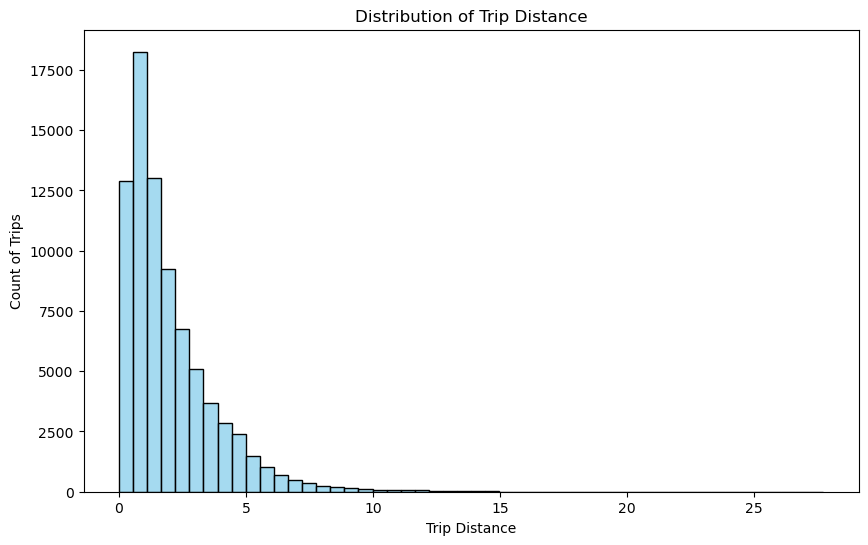

In [14]:
# Setup Figure
plt.figure(figsize=(10,6))

# Generate Histogram
sns.histplot(data=biketown_clean_df,
             x="Distance_Miles",
             bins=50,
             color="skyblue",
             edgecolor="black")

# Set Titles and Labels
plt.title("Distribution of Trip Distance")
plt.xlabel("Trip Distance")
plt.ylabel("Count of Trips")

# Show Figure
plt.show()

### Insights

* What stories is the histogram telling you?

## Scatter Plot

A Scatter Plot is used to visualize the relationship between two numerical values.

* The data is represented as points on a standard Cartesian coordinate system.
* Each point on the graph presents a single observation.
* The point's horizontal position is the value for the first numerical value.
* The point's vertical position is the value for the second numerical value.

__When to use Scatter Plots:__

The primary goal of a scatter plot is to look for correlation (or association) between the two variables:

* __Positive Correlation:__ The points generally form a line sloping upward (as X increases, Y increases).

* __Negative Correlation:__ The points generally form a line sloping downward (as X increases, Y decreases).

* __No Correlation:__ The points appear randomly scattered with no obvious pattern.

* __Identifying Clusters/Outliers:__ They help easily spot groups of similar data points (clusters) or individual data points that fall far away from the main group (outliers).

## Scatter Plot: Distance and Duration

Is there a pattern between the distance and duration of a ride?

* Let's create a Scatter Plot to Visualize the relationship between `Distance_Miles` and `Duration_Seconds`

Syntax:

```python
sns.scatterplot(data = data,
                x = x,
                y= y)
```

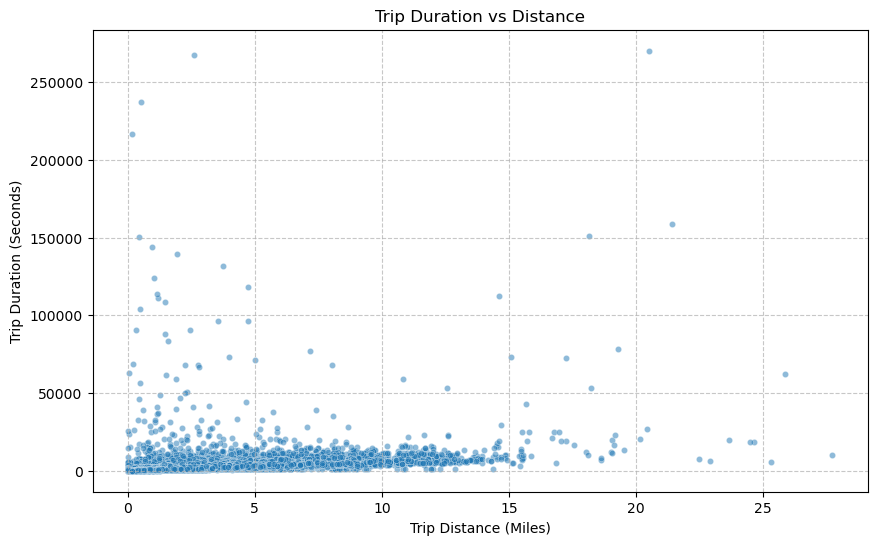

In [15]:
# Scatter Plot

# Set Up Figure
plt.figure(figsize=(10,6))

# Generate Scatter Plot
sns.scatterplot(data = biketown_clean_df,
                x="Distance_Miles",
                y="Duration_Seconds",
                alpha=0.5,
                s=20)

# Set Titles and Labels
plt.title("Trip Duration vs Distance")
plt.xlabel("Trip Distance (Miles)")
plt.ylabel("Trip Duration (Seconds)")
plt.grid(True, 
         linestyle="--",
         alpha=0.7)


### Scatter Plot: Insights

* What stories is the Scatter Plot telling you?

### Filtering the Scatter Plot for Outliers

* Set a y-limit on the plot to limit the data to rides no longer than 3 hours.
* Does the story change?

Syntax

```python
plt.ylim(min, max)
```

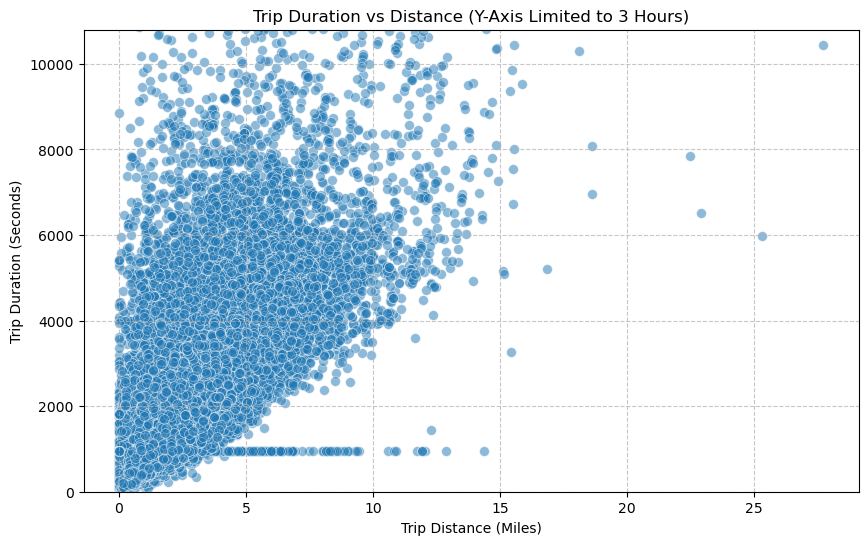

In [16]:
# Scatter Plot

# Set Up Figure
plt.figure(figsize=(10,6))

# Generate Scatter Plot
sns.scatterplot(data = biketown_clean_df,
                x="Distance_Miles",
                y="Duration_Seconds",
                alpha=0.5,
                s=50)

# Set Limits
plt.ylim(0,10800)

# Set Titles and Labels
plt.title("Trip Duration vs Distance (Y-Axis Limited to 3 Hours)")
plt.xlabel("Trip Distance (Miles)")
plt.ylabel("Trip Duration (Seconds)")
plt.grid(True, 
         linestyle="--",
         alpha=0.7)

## Scatter Plot: Start Hub

* Create a scatter plot using the `StartLongitude` and `StartLatitude` data.
* Consider setting limits on the x and y axis

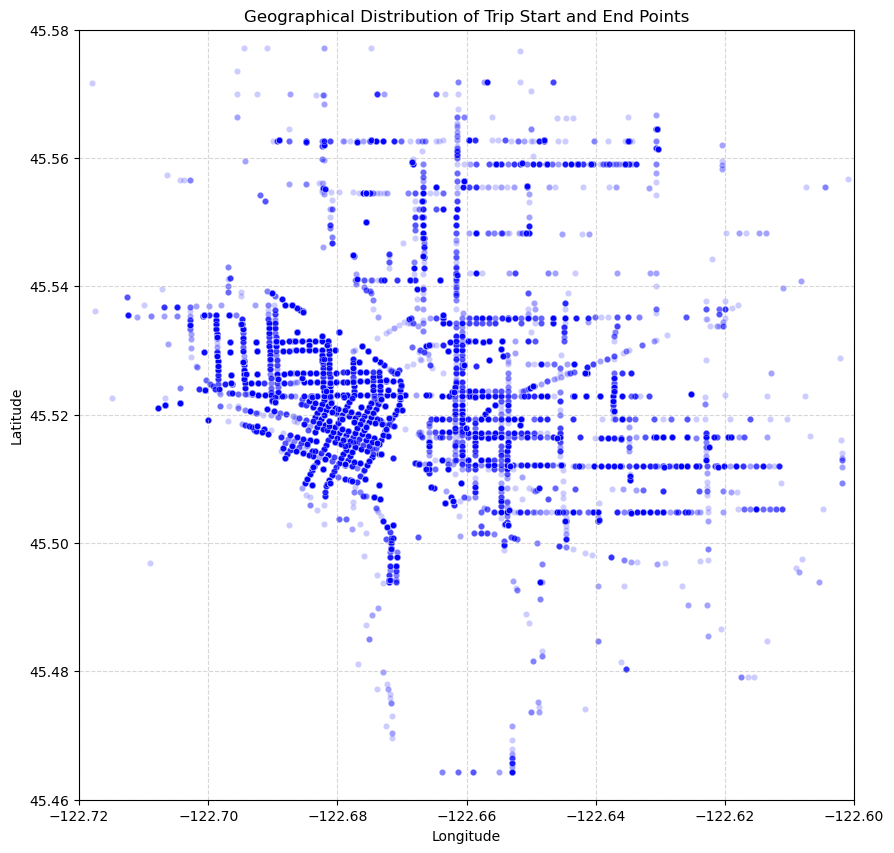

In [17]:
# Scatter Plot

# Set Figure
plt.figure(figsize=(10, 10))

# Generate Scatter plot
sns.scatterplot(
    data=biketown_clean_df,
    x='StartLongitude',
    y='StartLatitude',
    color='blue',
    alpha=0.2, 
    s=20
)

# Set Limits
plt.xlim([-122.72, -122.60])
plt.ylim([45.46, 45.58])
         
# Set Labels and Titles
plt.title('Geographical Distribution of Trip Start and End Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.5)

## Box Plots

A Box Plot Graphically represents the spread and center of numerical data.

<center><img src="../images/web/boxplot.png"></center>

image: [ArcGIS Pro](https://pro.arcgis.com/en/pro-app/latest/help/analysis/geoprocessing/charts/box-plot.htm)

__Breakdown:__

* __The Box:__ Represents the Interquartile Range (Q1 - Q3). Which is the middle 50% of the data.
* __The Line in the Box:__ Represents the Median (Q2) or 50th percentile, which is the center of the data.
* __The Whiskers:__ These lines extend from the box to show the minimum and maximim values without outliers
* __The Points:__ The data points lying outside the whiskers are considered ouliers.

__When to Use Box Plots:__

* Comparing the distribution of one or more groups.
* Identifying median values
* Finding Outliers
* Assessing the symmetry of the data (if the median is not in the center, the data is skewed).

## Box Plot: Duration and Payment Plan

Is there a difference in the ride duration between subscribers and casual riders?

* Create a Box Plot to Visualize Key Information on the `Duration_Seconds` and `Payment_Plan` columns.


Syntax:

```python
sns.boxplot(data=data],
            x=x,
            y=y,
            hue=hue,
            palette=palette)
```

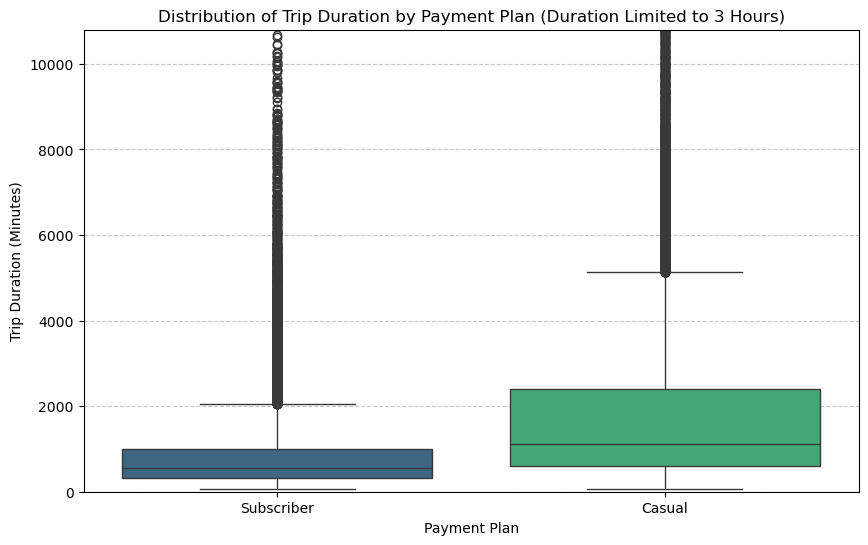

In [18]:
# Box Plot

# Set Figure
plt.figure(figsize=(10,6))

# Generate Box Plot
sns.boxplot(data=biketown_clean_df,
            x="PaymentPlan",
            y="Duration_Seconds",
            hue="PaymentPlan",
            palette="viridis")

# Set Limits and What Not
plt.ylim(0, 10800)

# Set Labels and What Not
plt.title("Distribution of Trip Duration by Payment Plan (Duration Limited to 3 Hours)")
plt.xlabel("Payment Plan")
plt.ylabel("Trip Duration (Minutes)")
plt.grid(axis="y", 
         linestyle="--",
         alpha=0.7)

### Box Plot - Insights

* What stories did the boxplot reveal to you?

## Box Plot: Distance and Payment Plan

* Create a box plot to visualize `PaymentPlan` and `Distance_Miles`.
* What stories might the visualization reveal?

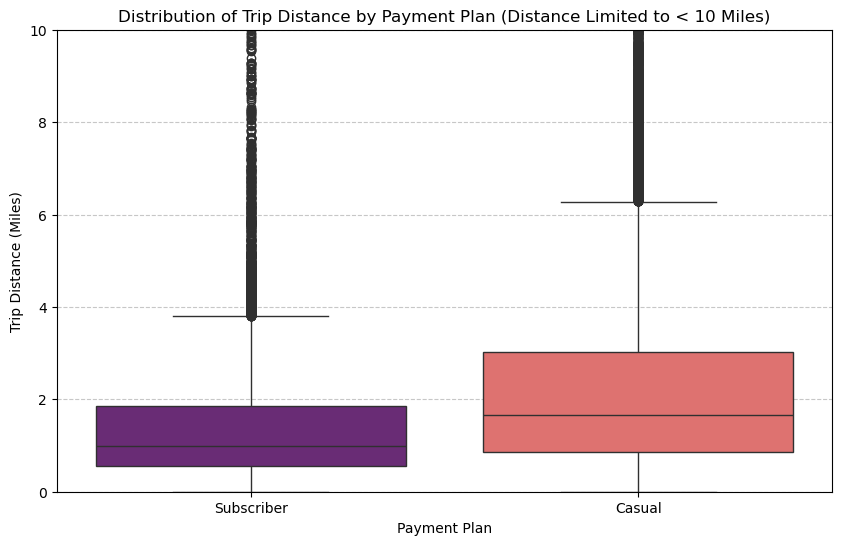

In [19]:
# Set Figure
plt.figure(figsize=(10, 6))

# Generate Box Plot
sns.boxplot(
    data=biketown_clean_df,
    x="PaymentPlan",
    y="Distance_Miles",
    hue="PaymentPlan",
    palette="magma"
)

# Set Limits
plt.ylim(0,10)

# Set Labels and Titles
plt.title('Distribution of Trip Distance by Payment Plan (Distance Limited to < 10 Miles)')
plt.xlabel('Payment Plan')
plt.ylabel('Trip Distance (Miles)')
plt.grid(axis='y', linestyle='--', alpha=0.7)